In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [187]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Available nodes:", list(graph.nodes))
    print("Available edges:", list(graph.edges))
    if type(graph) == nx.classes.digraph.DiGraph:
        print("Connected components:", 
              list(nx.weakly_connected_components(directed_graph)))
    else:
        print("Connected components:", list(nx.connected_components(graph)))
    print("Node degree:", dict(undirected_graph.degree()))
    
def draw_graph(graph, figsize=(10,8), title=""):
    np.random.seed(2021)
    fig, ax = plt.subplots(figsize=figsize)
    nx.draw(graph, with_labels=True, font_color='white')
    plt.title(title)
    plt.show()
    
def draw_signed_graph(graph, figsize=(10,8), title=""):
    np.random.seed(2021)
    fig, ax = plt.subplots(figsize=figsize)
    edge_color_dict = {1: "green", -1: "red"}
    edge_colors = [edge_color_dict[sign] for _, _, sign in graph.edges(data="sign")]
    nx.draw(graph, with_labels=True, edge_color=edge_colors, node_size=400, font_color='white')
    plt.title(title)
    plt.show()

## 1. Undirected graph

### 1.1 Create graph using `nx.Graph()` and `add_edge()`

In [117]:
%%time

# create graph by adding edges
undirected_graph = nx.Graph()
undirected_graph.add_edge('A','B')
undirected_graph.add_edge('B','C')
undirected_graph.add_edge('D','A')
undirected_graph.add_edge('E','F')

# display graph info
get_graph_info(undirected_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'C': 1, 'D': 1, 'E': 1, 'F': 1}
Wall time: 957 µs


### 1.2 Create graph using `nx.Graph()` class constructor

In [118]:
%%time

# create graph from edge list
edgelist = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
undirected_graph = nx.Graph(edgelist)

# display graph info
get_graph_info(undirected_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 4 ms


### 1.3 Create graph using `nx.from_pandas_edgelist()`

In [119]:
%%time
# create graph from pandas dataframe
relationships = pd.DataFrame({'from': ['A', 'A', 'B', 'E'], 
                              'to':   ['B', 'D', 'C', 'F']})
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# display graph info
get_graph_info(undirected_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 3 ms


ValueError: Received invalid argument(s): edge_colors

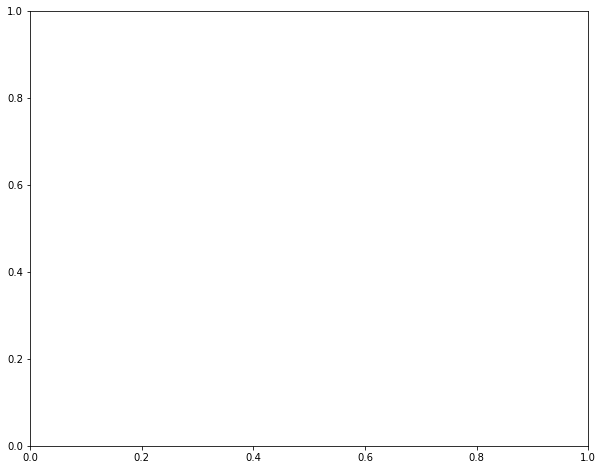

In [170]:
# visualize the undirected graph
draw_graph(undirected_graph, title="Undirected graph")

## 2. Directed graph

### 2.1 Create directed graph using `nx.DiGraph()` and `add_edge()`

In [121]:
%%time

# create graph by adding edges
directed_graph = nx.DiGraph()
directed_graph.add_edge('A','B')
directed_graph.add_edge('B','C')
directed_graph.add_edge('D','A')
directed_graph.add_edge('E','F')

# display graph info
get_graph_info(directed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('B', 'C'), ('D', 'A'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 1e+03 µs


### 2.2 Create graph using `nx.DiGraph()` class constructor

In [124]:
%%time

# create graph from edge list
edgelist = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
directed_graph = nx.DiGraph(edgelist)

# display graph info
get_graph_info(directed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 1 ms


### 2.3 Create graph using `nx.from_pandas_edgelist()`

In [125]:
%%time
# create graph from pandas dataframe
relationships = pd.DataFrame({'from': ['A', 'A', 'B', 'E'], 
                              'to':   ['B', 'D', 'C', 'F']})
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.DiGraph())

# display graph info
get_graph_info(directed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 2 ms


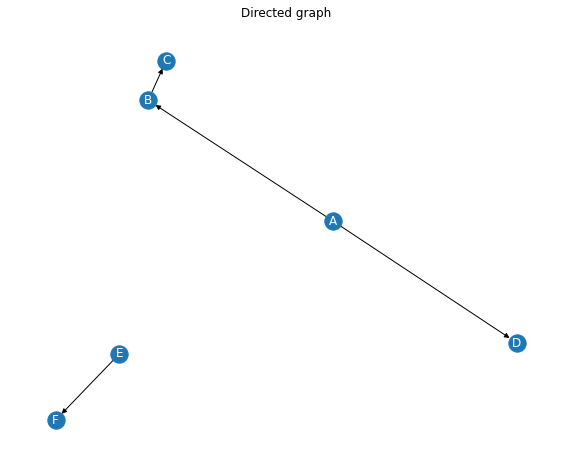

In [127]:
# visualize the directed graph
draw_graph(directed_graph, title="Directed graph")

## 3. Signed graph

In [193]:
%%time

# create signed graph
signed_graph = nx.Graph()
signed_graph.add_edge('A','B', sign= 1)
signed_graph.add_edge('B','C', sign= -1)
signed_graph.add_edge('D','A', sign= 1)
signed_graph.add_edge('E','F', sign= -1)

# display graph info
get_graph_info(signed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'B', 'D', 'C', 'A'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 1e+03 µs


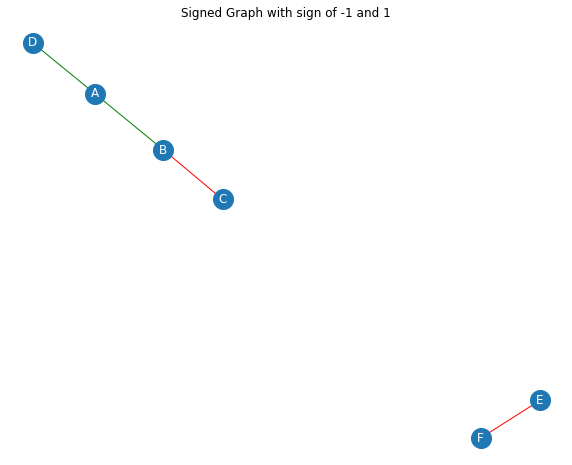

Wall time: 135 ms


In [192]:
%%time
draw_signed_graph(signed_graph, title="Signed Graph with sign of -1 and 1")